In [1]:
import pandas as pd
# parameter name is always Carbon monoxide, and units of measure is always ppm, so we can drop them
# and the local date is always the same so we can drop it too
df = pd.read_csv(filepath_or_buffer='/kaggle/input/air-quality-data/c4_epa_air_quality.csv', index_col=[0], 
                 parse_dates=['date_local']).drop(columns=['date_local', 'parameter_name', 'units_of_measure'])
# we need to the state abbreviations to make the choropleth below
df = df.merge(right=pd.read_csv(filepath_or_buffer='/kaggle/input/usa-state-name-code-and-abbreviation/data.csv', 
                                usecols=['State', 'Code']).rename(columns={'State': 'state_name'}),
              on='state_name', how='inner')
df.head()

,state_name,county_name,city_name,local_site_name,arithmetic_mean,aqi,Code
0,Arizona,Maricopa,Buckeye,BUCKEYE,0.473684,7,AZ
1,Arizona,Maricopa,Mesa,MESA,0.505263,10,AZ
2,Arizona,Pima,Tucson,CHILDREN'S PARK NCore,0.331579,7,AZ
3,Arizona,Maricopa,Chandler,WEST CHANDLER,0.800000,19,AZ
4,Arizona,Maricopa,Phoenix,JLG SUPERSITE,0.978947,20,AZ


In [2]:
df.nunique()

state_name          50
county_name        147
city_name          188
local_site_name    251
arithmetic_mean    150
aqi                 29
Code                50
dtype: int64

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257 entries, 0 to 256
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   state_name       257 non-null    object 
 1   county_name      257 non-null    object 
 2   city_name        257 non-null    object 
 3   local_site_name  254 non-null    object 
 4   arithmetic_mean  257 non-null    float64
 5   aqi              257 non-null    int64  
 6   Code             257 non-null    object 
dtypes: float64(1), int64(1), object(5)
memory usage: 14.2+ KB


In [4]:
from plotly.express import histogram
histogram(data_frame=df, x='arithmetic_mean')

In [5]:
histogram(data_frame=df, x='aqi')

In [6]:
from plotly.express import strip
strip(data_frame=df, x='state_name', y='arithmetic_mean', hover_name='aqi')

In [7]:
strip(data_frame=df, x='state_name', hover_name='arithmetic_mean', y='aqi', )

In [8]:
from plotly.express import scatter
scatter(data_frame=df, y='aqi', x='arithmetic_mean', hover_name='state_name', trendline='ols')

The AQI is mostly a linear function of the CO2 ppm but not entirely.

In [9]:
from plotly.express import choropleth
choropleth(data_frame=df[['Code', 'arithmetic_mean']].groupby(by='Code').mean().reset_index(), scope='usa',
           locations='Code', color='arithmetic_mean', locationmode='USA-states', projection='albers usa',
          title='Mean CO2 ppm')

It's hard to believe that Nevada's air is really dirtier than any other state's, but that seems to be what the data says.

In [10]:
choropleth(data_frame=df[['Code', 'aqi']].groupby(by='Code').mean().reset_index(), scope='usa',
           locations='Code', color='aqi', locationmode='USA-states', projection='albers usa',
          title='Mean AQI')

(-0.5, 1199.5, 1199.5, -0.5)

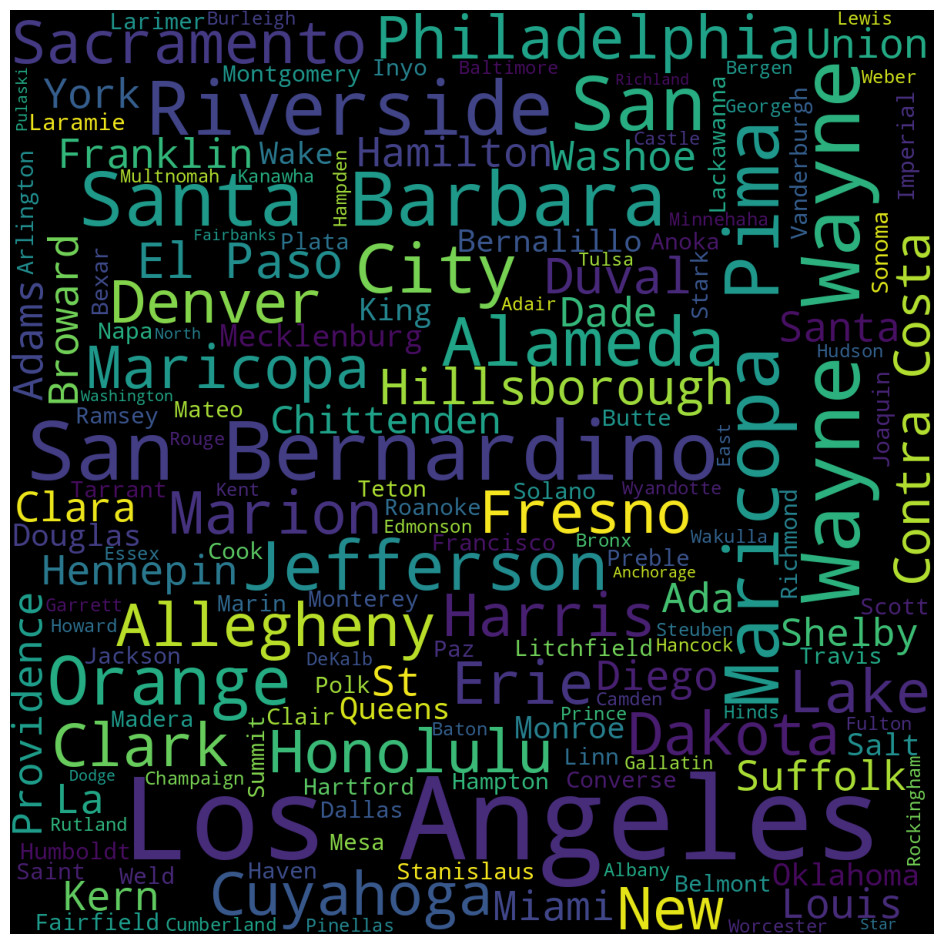

In [11]:
from matplotlib.pyplot import subplots
from matplotlib.pyplot import axis
from matplotlib.pyplot import imshow
from wordcloud import WordCloud
subplots(figsize=(12, 12))
imshow(X=WordCloud(random_state=2023, height=1200, width=1200 ).generate(text=' '.join(df['county_name'].values), ))
axis('off')

(-0.5, 1199.5, 1199.5, -0.5)

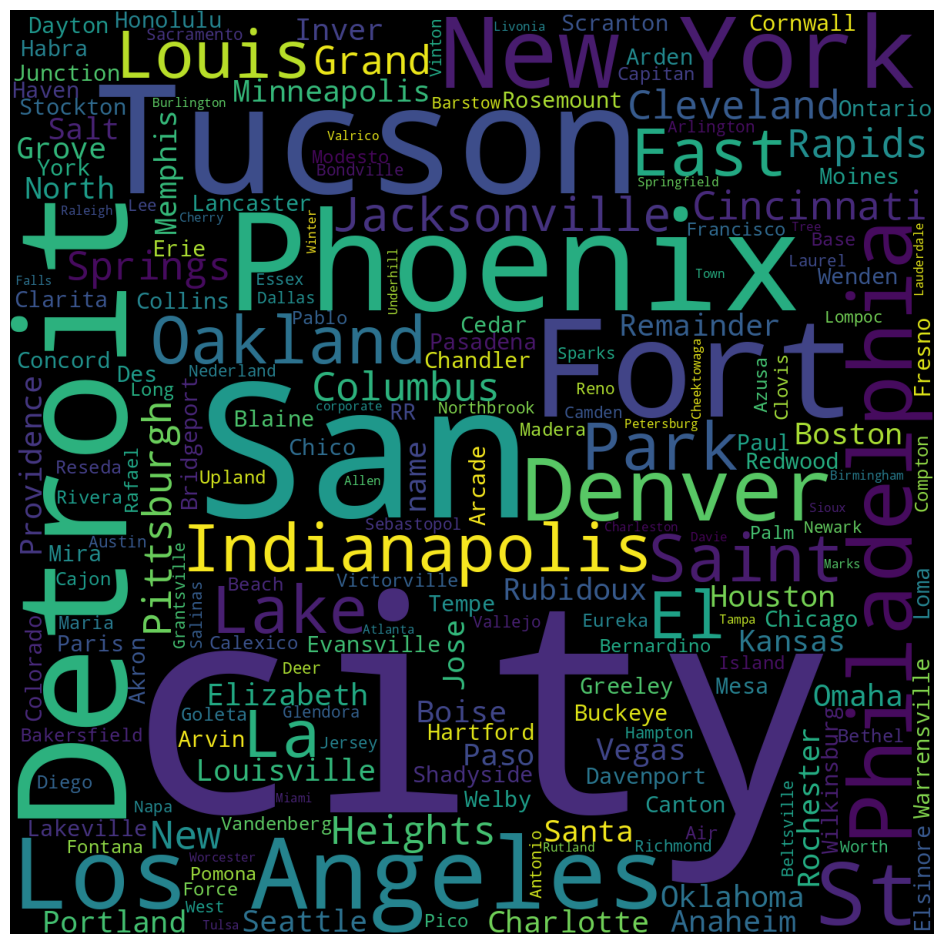

In [12]:
subplots(figsize=(12, 12))
imshow(X=WordCloud(random_state=2023, height=1200, width=1200 ).generate(text=' '.join(df['city_name'].values), ))
axis('off')

(-0.5, 1199.5, 1199.5, -0.5)

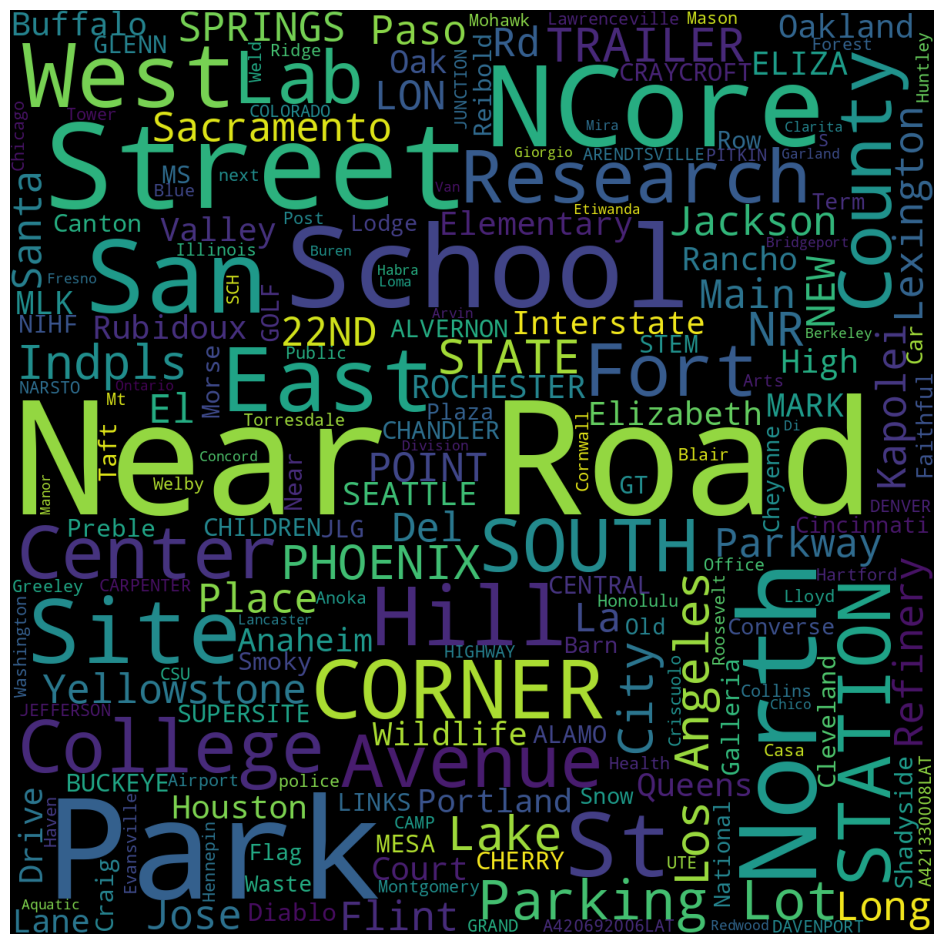

In [13]:
subplots(figsize=(12, 12))
imshow(X=WordCloud(random_state=2023, height=1200, width=1200 ).generate(text=' '.join(df[df['local_site_name'].notnull()]['local_site_name'].values), ))
axis('off')